# Data Science - Coursework 1 (35%)

***

## Short Style Data Science Questions
### Deadline Friday week 6, 2pm.

***

## Instructions

This coursework assesses learning outcomes from **Chapters 1 - 5** of the course.

**These assessments are equivalent to an exam**:
- Submit your work via Turn-It-In on Learning Central. Note that you will need to upload your final notebook exported as a pdf. **Don't forget to execute all of your cells before you export the notebook to pdf**.
- You can constantly resubmit your turnitin document until the deadline.
- The breakdown of the assessment criteria is provided in Learning Central under Assessment.
- Don't forget to include **all code** (including for calculations) - your work should be entirely reproducible.
- Don't worry about how your code looks - marks are not given for pretty code, but rather for the approach used in solving the problem, your reasoning, explanation and answer.
- It is estimated that the workload required for this CA is approximately 15-20 hours.

<div class="alert-info">
Please also take note of the University’s policy on plagiarism, which is outlined in your student handbook.
 </div>

Plagiarism is the act of passing off the words or ideas of others as if your own. Advice on avoiding plagiarism is given in the UG Student Handbook. There is also considerable help and advice on Learning Central and the University web site. Students need to be especially careful of plagiarism in computing tasks and you are advised not to share code through electronic means. Students working together during their weekly exercises and the coursework is great (and indeed encouraged) but need to ensure that they are not using each other's code or text.

This coursework will be submitted via Learning Central's Turnitin which automatically checks for plagiarism.

***

## QUESTION 1

1.3 QUESTION 1

A student is taking three modules, and the probability that they pass any individual module depends on the fraction of the weekly live sessions they attend
𝑓
f so that the probability of passing the module is
0.85
𝑓.

a.) If the student attends all the weekly live sessions, (f=1), calculate the probability that they will
(i) pass all three modules,
(ii) fail one module and pass the other two,
(iii) pass only one module,
(iv) pass no modules.

b.) Show that the sum of these four probabilities is 1.

c.) Calculate the four probabilities on the assumption that the student attends only half of the weekly live sessions.

d.) What fraction of weekly live sessions must the student attend to have a 50% chance of passing all three modules?

e.) Is this a realistic way to model the probability that the student will pass the modules?


**[10 marks]**

Answer:

In [15]:
def passfunc(f):
  return f*0.85

'''A)'''
'''i)'''
#for the probability of all 3 passes you would multiply the probability for a single pass by itself 3 times...
allPassA = passfunc(1) * passfunc(1) * passfunc(1)
print(f"{allPassA:.3f}")

'''ii)'''
#fail one module and pass the other 2 = pass*pass*(1-pass). 3 ways, fail module one two or three
oneFailA = 3 * (passfunc(1) * passfunc(1) * (1-passfunc(1)))
print(f"{oneFailA:.3f}")

'''iii)'''
#fail 2 modules, 3 ways
twoFailA = 3* (passfunc(1) * (1-passfunc(1)) * (1-passfunc(1)))
print(f"{twoFailA:.3f}")

'''iv)'''
#failAll
allFailA = (1-passfunc(1)) * (1-passfunc(1)) * (1-passfunc(1))
print(f"{allFailA:.3f}")

'''B)'''

#Add to one?
print(f"{allPassA + oneFailA + twoFailA + allFailA:.3f}")

0.614
0.325
0.057
0.003
1.000


In [16]:
'''C)'''
# These are yes/no, or in this case Pass/NoPass, results. Having a fixed probability within a set number of trials/tests.
# We can also model these calculations using binomial statstics.

import math

def Binomial(n, k, p):
    # n: number of trials, k: successes , p: probability of a single event
    return math.comb(n, k) * (p**k) * ((1-p)**(n-k))

p = passfunc(0.5)

n = 3 # number of tests


'''i)'''
#for the probability of all 3 passes...
allPassC = Binomial(n, 3, p)
print(f"All Pass: {allPassC:.3f}")

'''ii)'''
#fail one module and pass the other 2
oneFailC = Binomial(n, 2, p)
print(f"One Fail: {oneFailC:.3f}")

'''iii)'''
#fail 2 modules
twoFailC = Binomial(n, 1, p)
print(f"Two Fail: {twoFailC:.3f}")

'''iv)'''
#failAll
allFailC = Binomial(n, 0, p)
print(f"All Fail: {allFailC:.3f}")

#sanity check
print(f"{allPassC + oneFailC + twoFailC + allFailC:.3f}")

All Pass: 0.077
One Fail: 0.312
Two Fail: 0.422
All Fail: 0.190
1.000


In [17]:
'''how to find 50% for all passes.. brute force seams easy but hacky (for incremental values, find the 50%)
from P = (0.85f)**3
P**1/3 = 0.85f
f = (P**1/3)/0.85'''

def inversePassFunc(P):
  return (P**(1/3))/0.85

print(f"{inversePassFunc(0.5):.3f}")

0.934


In [18]:
#sanity
print(f"{passfunc(0.934)**3:.3f}")

0.500


***

##  QUESTION 2

**[20 marks]**

Answer:

I will be using the Binomial distribution to analise the patient data, as it is a collection of yes no results, using the function defined in Q1. Using it to examine the probability of achiving 7 possitive results out of 7 trials.

To compare the new trial with the old, we state a null hypothesis:

The outcome of a trial with the new marker (M23) would have the same probability distribution as any trial undertaken with the old marker (D3).

To test this null hypothesis we can calculate the probability of getting 7/7 successes with an assumption that the single success probability was 0.65. The same as D3's probability of success, in line with the null hypothesis.


In [19]:
'''Binomial,

N=7, Theta =0.65 (same as D3, null hyp is that they are the same), Nu = 7(all successes)

using my function from Q1'''


print(f"{Binomial(7, 7, 0.65):.3f}")

0.049


The calculation (code above) yielded a probability of 0.049. The standard threshold to reject a null hypothesis is to have a p < 0.05. Therefore, with a note to how close to the threshold we are, we can reject the null hypothesis and based on these results support M23 as a better marker for the disease than D3.

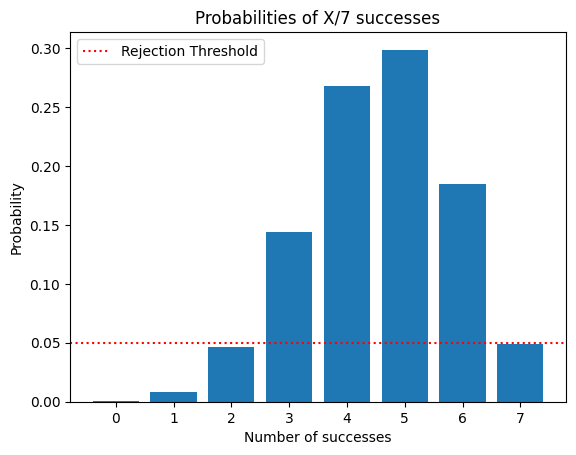

In [20]:
'''Plot Distribution'''
import matplotlib.pyplot as plt

successes = [0,1,2,3,4,5,6,7]
probabilities = [Binomial(7,k,0.65) for k in successes]

plt.bar(successes, probabilities)
plt.axhline(y=0.05, color='r', linestyle=':', label='Rejection Threshold')
plt.xlabel('Number of successes')
plt.ylabel('Probability')
plt.title('Probabilities of X/7 successes')
plt.legend()
plt.show()

***

## QUESTION 3

A computer chip manufacturer suspects that roughly half of its latest batch of CPUs contains a flaw. The accounts department are clearly concerned, and are trying to predict how the fault will affect the number of customers returning products. How many CPUs from the batch would they need to examine to know the probability that any given CPU is faulty to better than 2.5%?

**[15 marks]**

Answer:

As we sample from a large population N (the entire batch of microchips) we can expect the central limit theorm to come into play.
Our sample mean will be a distance away from the true population mean by a multiple of the Standard error.
The margin of error is that distance.

MOE = z * SE

The standard error is

SE = squreroot(sigma_x / sqrt(n))

As this is a collection of yes/no we can use the Bernoulli distribution give us a variance of P(1-P), leading to a new SE of

SE = squreroot( P(1-P) / n )

here we can use sample size as n, to aproximate standard error, as well as assume a required confidence interval of 95%, equating to 1.9 sigma

From the question we know the accounts department would like the margin of error to be lower than 2.5%, or a fraction of 0.025. And the suspected probability for chips with faults is 0.5

MOE = z * squreroot( P(1-P) / n )

We can arrange this for n

n = (z^2 * P(1-P)) / MOE^2

n  = (1.9^2 * 0.5(1-0.5)) / 0.025^2

n = 1444




In [ ]:
def moe(n, z, P):
  return z * math.sqrt(P*(1-P)/n)

numbers = range(1,500000,100)
allMoes = []

tightNumbers = range(1400,1500,1)
tightMoes = []

for n in numbers:
  allMoes.append(moe(n,1.9,0.5))
for n in tightNumbers:
  tightMoes.append(moe(n,1.9,0.5))

allMoes = np.array(allMoes)
tightMoes = np.array(tightMoes)


plt.plot(numbers,allMoes)
plt.plot(tightNumbers,tightMoes)
plt.figure()
plt.plot(tightNumbers,tightMoes)


# answerIndex = np.where(tightMoes == 0.025) #too exact
closest_index = np.argmin(np.abs(tightMoes - 0.025)) #ChatGPT special here
print(tightNumbers[closest_index])



0.95

***

## QUESTION 4

**[25 marks]**

In [23]:
'''  P(A|B) = P(B|A) * P(A) / P(B)

P(A|B) = Deomcrat given opposed
P(B|A) = opposed given Demo (0.2)
P(A) = Demo (0.4)
P(B) = Opposed ((demo * demo opp) + (repub * repOpp) + (indi * indi Opp)) ((0.4*0.2)+(0.36*0.65)+(0.24*0.9))
'''

PAB = 0.2 * 0.4 / ((0.4*0.2)+(0.36*0.65)+(0.24*0.9))

print(f"{PAB:.3f}")

0.151


Answer:

The probability of the police officer being a Democrat voter is 15%

***

## QUESTION 5

<Figure size 640x480 with 0 Axes>

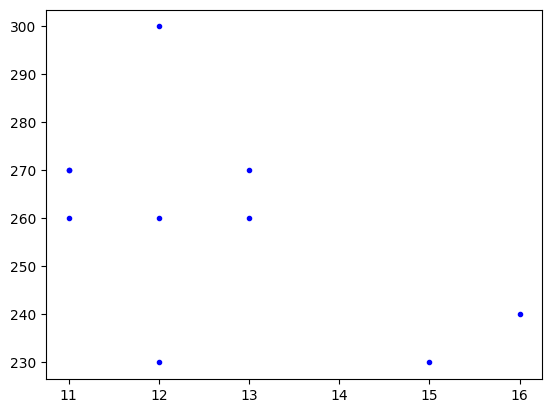

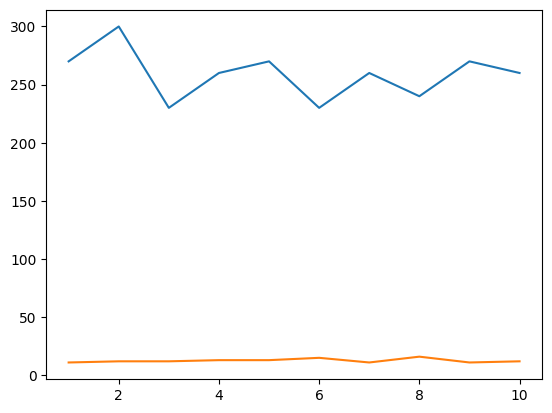

<Figure size 640x480 with 0 Axes>

In [24]:
import numpy as np


m100 = np.array([11,12,12,13,13,15,11,16,11,12])
m1500 = np.array([270,300,230,260,270,230,260,240,270,260])
MemberNumber = range(1,11,1)

plt.plot(m100,m1500,"b.")
plt.figure()

plt.plot(MemberNumber,m1500)

plt.plot(MemberNumber,m100)
plt.figure()



**[30 marks]**

Answer: